# Heart Disease **Prediction**

**PROBLEM STATEMENT:**
**Predict whether a patient has heart disease based on their medical attributes**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Collection and Processing**

In [ ]:
#loading the csv data to a pandas dataframe
heart_data = pd.read_csv('/content/desiese_data.csv')

In [ ]:
# Print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,id
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1,5


In [ ]:
#Print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,id
298,57,Male,0,140,241,0,1,123,1,0.2,1,0,3,0,299
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,0,300
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,0,301
301,57,Female,0,130,131,0,1,115,1,1.2,1,1,3,0,302
302,57,Male,1,130,236,0,0,174,0,0.0,1,1,2,0,303


In [ ]:
# No of rows and columns in the dataset
heart_data.shape

(303, 15)

In [ ]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heart_data['sex'] = le.fit_transform(heart_data['sex'])

In [ ]:
print(heart_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    1   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    0   0       130   131    0        1      115      1      1.2   
302   57    1   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target   id  
0        0   0     1       1    1  
1        0   0 

In [ ]:
heart_data.drop(['id'], inplace=True , axis=1)

In [ ]:
print(heart_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    1   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    0   0       130   131    0        1      115      1      1.2   
302   57    1   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [ ]:
heart_data.duplicated().sum()

np.int64(0)

In [ ]:
# getting some information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#checking for the missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.693069,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.461983,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


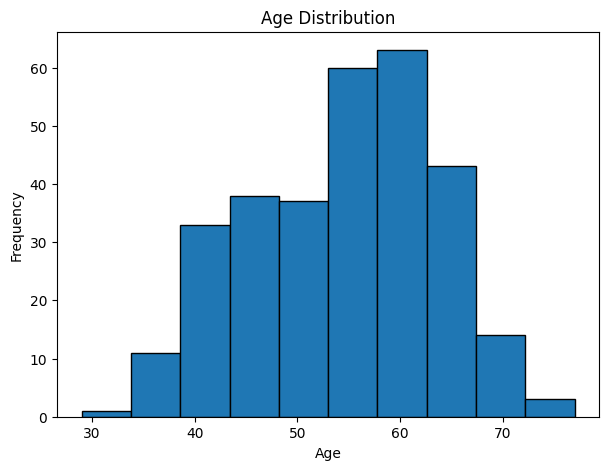

'plot a histogram for age to understand how the ages of patients are distributed\nand to see which age groups are most common in the heart disease dataset.'

In [ ]:
# plotting histogram of age
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(heart_data['age'], bins=10, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

'''plot a histogram for age to understand how the ages of patients are distributed
and to see which age groups are most common in the heart disease dataset.'''

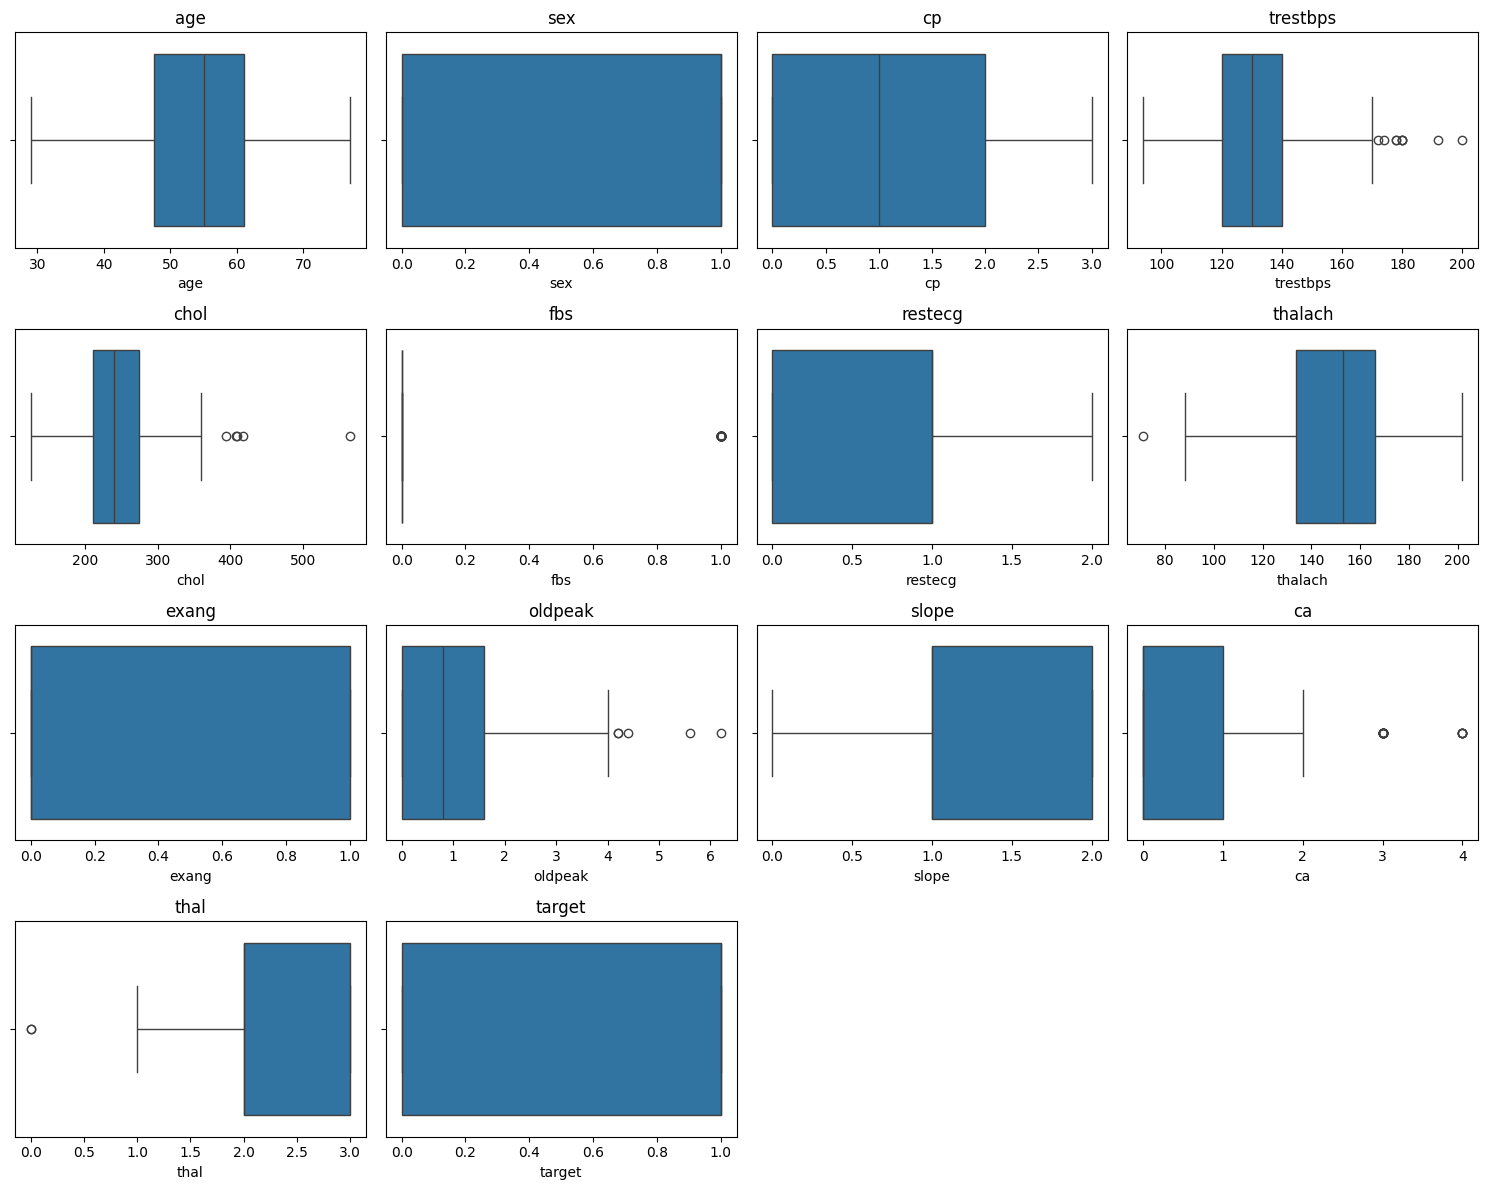

In [ ]:
#boxplot for this dataset to detect outliers and compare the distribution of key health features that may affect heart disease risk.
import seaborn as sns
plt.figure(figsize=(15, 12))

for i, column in enumerate(heart_data.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=heart_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
#Checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1 (means Defective Heart)
0 (means Healthy Heart)

**Splitting the Features and Target**

In [ ]:
x = heart_data.drop(columns='target',axis=1)
y = heart_data['target']

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    1   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    0   0       130   131    0        1      115      1      1.2   
302   57    1   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print (y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


**Splitting the Data into Training data & test data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


**Model Training **

# **Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
#training the LogisticRegression model with training data
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,0,0,125,304,0,0,162,1,0.0,2,3,2
160,56,0,1,120,240,0,1,169,0,0.0,0,0,2
158,58,0,1,125,220,0,1,144,0,0.4,1,4,3
289,55,1,0,128,205,0,2,130,1,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [ ]:
y_train

,target
61,1
238,0
160,1
158,1
289,0
...,...
100,1
49,1
300,0
194,0


In [ ]:
#prediction
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22,  6],
       [ 7, 26]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



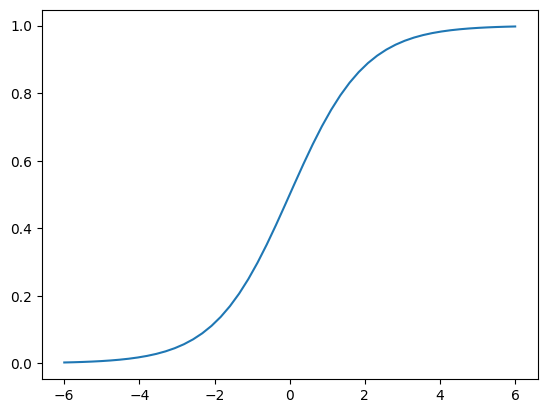

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
  return np.exp(x) / (1 + np.exp(x))

x = np.linspace(-6, 6, 50, dtype=float)
y = logistic(x)
plt.plot(x, y)
plt.show()

**Model Evaluation**

In [ ]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on training data:', training_data_accuracy)

Accuracy on training data: 0.8553719008264463


In [ ]:
#Accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data:', test_data_accuracy)

Accuracy on Test data: 0.7868852459016393


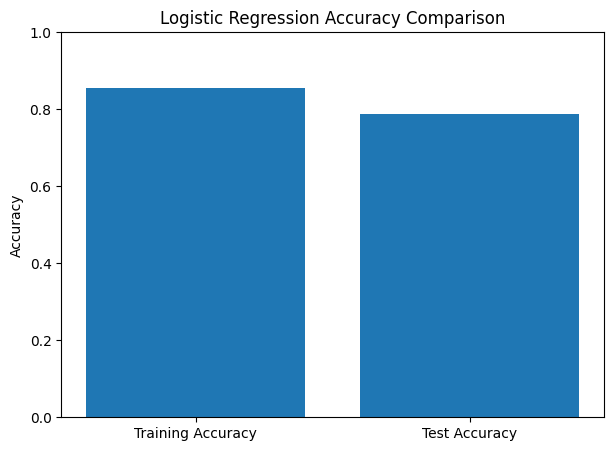

In [ ]:
#plotting
import matplotlib.pyplot as plt

accuracies = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(7,5))
plt.bar(labels, accuracies)
plt.title("Logistic Regression Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # accuracy range from 0 to 1
plt.show()

**Building a Predictive System**

In [ ]:
#input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data =(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Decision Tree**

In [ ]:
'''to identify the most important health factors that split patients
into heart-disease and no-disease groups. It helps make predictions by visually
showing how different features lead to the final diagnosis.'''
heart_data = pd.read_csv('/content/desiese_data.csv')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heart_data['sex'] = le.fit_transform(heart_data['sex'])
x= heart_data.drop(columns='target',axis=1)
y = heart_data['target']

In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#model building
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
cv_score

array([1.        , 1.        , 1.        , 1.        , 0.97916667])

In [ ]:
print(cv_score.mean())

0.9958333333333333


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
cv_score

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
#prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
#accuracy
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [ ]:

#confusion matrix
con=confusion_matrix(y_test, y_pred)
con

array([[28,  0],
       [ 0, 33]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



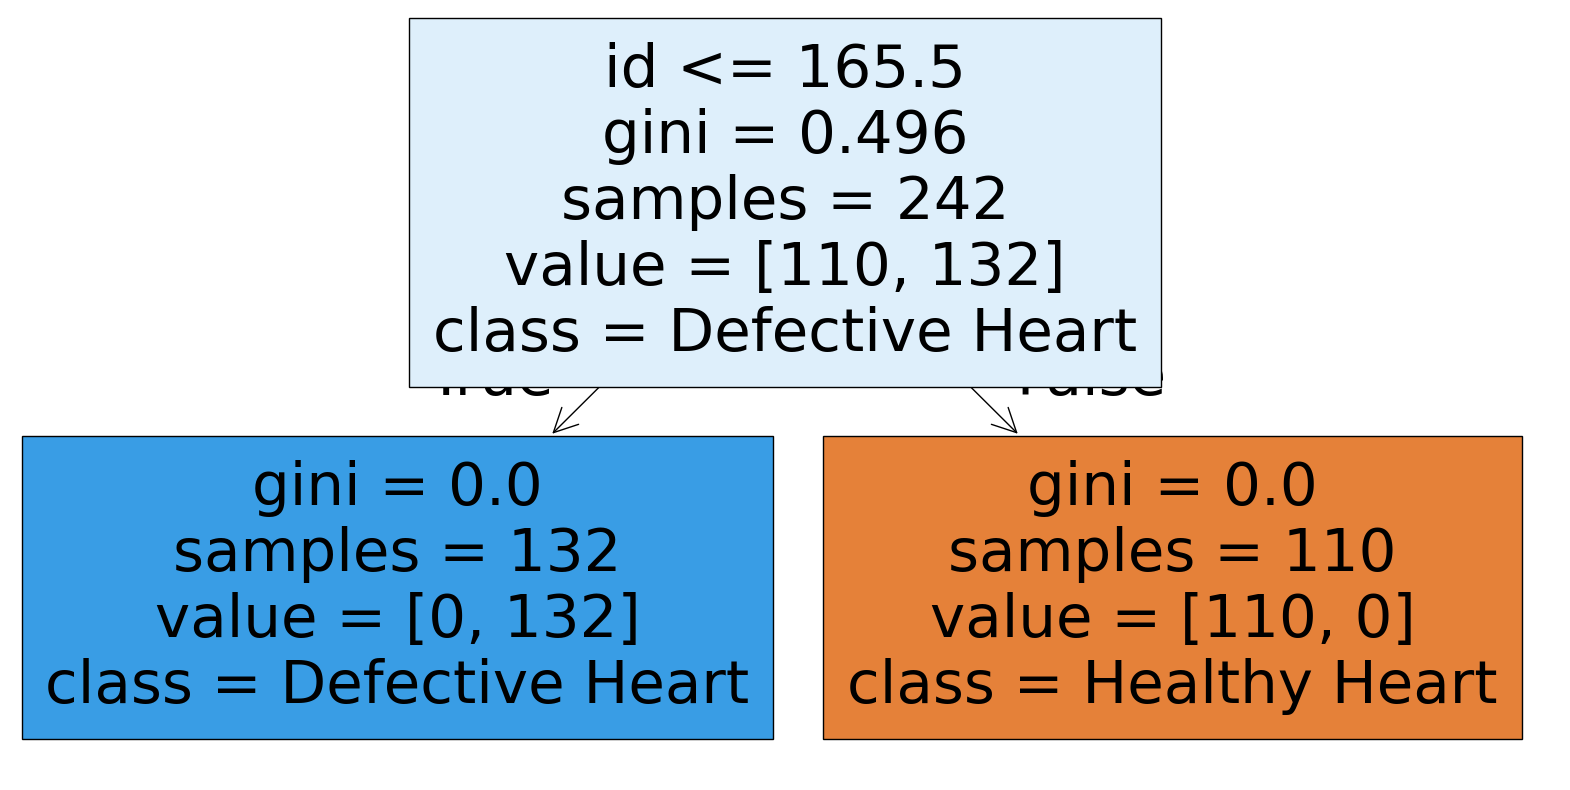

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns.tolist(), class_names=['Healthy Heart', 'Defective Heart'], filled=True)
plt.show()

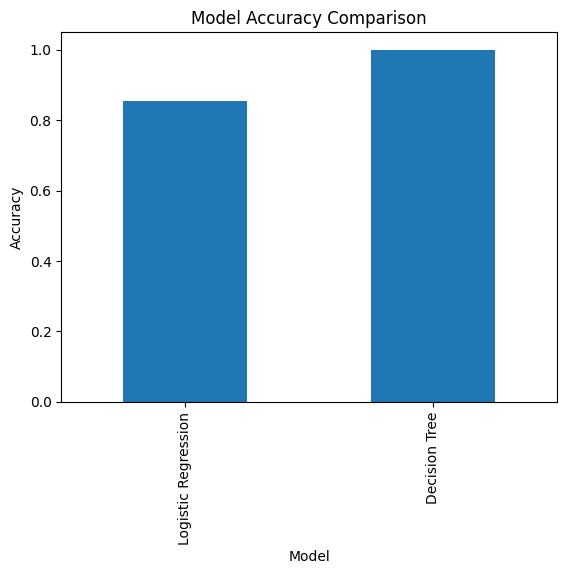

In [ ]:
accuracy = {'Logistic Regression': training_data_accuracy, 'Decision Tree': acc}
accuracy = pd.Series(accuracy)
accuracy.plot(kind='bar', title='Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()